# Line of Best Fit

## Outline
- What is a Line of Best Fit
- Simple line fit to a scatter plot using Least Squares
- Displaying the plot
- Line fit to a generated data set using sklearn and LinearRegression()
- Wrapping up

  
 ### Definition of the Line of Best fit
   
The line of best fit (or trendline) is an educated guess about where a linear equation might fall in a set of data plotted on a scatter plot. It helps us to see if there is a relationship or correlation between the two factors being studied. This trendline helps us to predict future events relating to the data being studied.

## Simple line fit to a scatter plot using Least Squares method

The "least squares" method is a form of mathematical regression analysis used to determine the line of best fit for a set of data, providing a visual demonstration of the relationship between the data points. Each point of data represents the relationship between a known independent variable and an unknown dependent variable.

<img src="images/Least_Squares_Regression.png" width="500">

In the following example we will:
- Generate random points for x and y
- Calcualte the best fit line for "N" (500) points using the y=mx+b equation for the line
    - Step 1: For each (x,y) point calculate x2 and xy
    - Step 2: Sum all x, y, x2 and xy, which gives us Σx, Σy, Σx2 and Σxy (Σ means "sum up")
    - Step 3: Calculate Slope m:
        - m =  N Σ(xy) − Σx ΣyN Σ(x2) − (Σx)2 
        - (N is the number of points.)
    - Step 4: Calculate Intercept b:
        - b =  Σy − m ΣxN 
    - Step 5: Assemble the equation of a line
        - y = mx + b


In [33]:
# include numpy for the rand() function
import numpy as np
# Create data
N = 500 # we want 500 points
x1 = np.random.rand(N)
y1 = np.random.rand(N)
# we will use the slope as our "line of best fit" using the least squares method: y=mx+b
# first calculate a denominator
denom1 = x1.dot(x1) - x1.mean() * x1.sum()
# now calulate m and b
m = (x1.dot(y1)-y1.mean()* x1.sum())/denom1
b = (y1.mean() * x1.dot(x1) - x1.mean() * x1.dot(y1))/denom1
# now calculat the best fit y values
ybf1 = m*x1 + b

## Displaying the plot
Now that we have the equation of the "best fit" line we can use **matplotlib** to display the scatter plot and the best fit line.


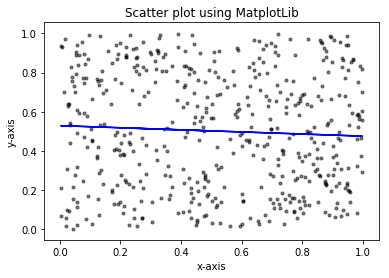

In [34]:
# import Pyplot
import matplotlib.pyplot as plt
# define the colors and shape (area) parameters
colors = (0,0,0)
area = np.pi*3

# Creat the scatter plot by using the scatter function
plt.scatter(x1, y1, s=area, c=colors, alpha=0.5)
# Add in the title
plt.title('Scatter plot using MatplotLib')
# Add in the line of best fit
plt.plot(x1, ybf1, 'b')
# Add in the labels
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Line fit to a generated data set using sklearn and LinearRegression()
As a slightly different example of generating a "best fit" line we will use a linear regression technique from the Python Library **sklearn**. The module is ``LinearRegression``.

In addition, we will be using the sklearn dataset module, ``make_blobs`` to generate isotropic Gaussian blobs for clustering. This will give us a nice set of scatter plot data to use for our "fit lines".


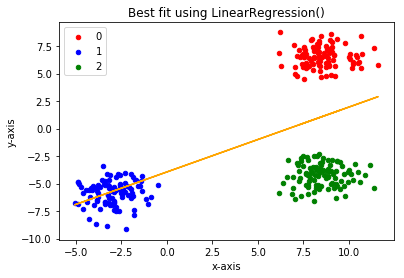

In [36]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X1, y1 = make_blobs(n_samples=300, centers=3, n_features=2)
# define the scatter plot, dots colored by class value
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
# creat the colors to use
colors = {0:'red', 1:'blue', 2:'green'}
# define our figure and axes
fig, ax = pyplot.subplots()
# group the "like" values in the dataframe (label)
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# calculate the line fit
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# create object for the class
linear_regressor = LinearRegression()  
# perform linear regression
linear_regressor.fit(X, Y)  
#call the linear regression function to determine the Y values for best fit
Y_pred = linear_regressor.predict(X)  # make predictions
# add in the best fit line
pyplot.plot(X, Y_pred, color='orange')
# Add in the title
pyplot.title('Best fit using LinearRegression()')
# Add in the labels
pyplot.xlabel('x-axis')
pyplot.ylabel('y-axis')
#show the plot
pyplot.show()

## Wrapping up
For more examples of scatter plots and best-fit lines, see the Matplotlib gallery:

https://matplotlib.org/3.1.1/gallery/index.html